In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
# Read in the csv
df = pd.read_csv("../Resources/Autism.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

# Be able to view all columns
pd.set_option('display.max_columns', None)

print(df.shape)
df.head()

(1117, 23)


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [3]:
# For this heatmap, we're going to focus on the other features, NOT the questionnaire
# df = df.drop(columns=['Case No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Score', 
#                       'Residence', 'Screening Type', 'Language'])
df = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','Ethnicity', 'Class']]
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Ethnicity,Class
0,0,0,0,0,0,0,0,0,0,0,white,NO
1,1,1,1,1,1,1,1,1,1,1,white,YES
2,1,1,0,1,1,0,0,1,0,0,black,NO
3,1,0,0,0,1,1,1,1,1,1,black,YES
4,1,1,1,0,0,0,0,1,0,0,aboriginal,NO


In [4]:

df = pd.get_dummies(df)

# Since there are only two possible labels, drop either one
df = df.drop(columns=['Class_NO'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Class_YES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1
2,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1
4,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


(0, 20)

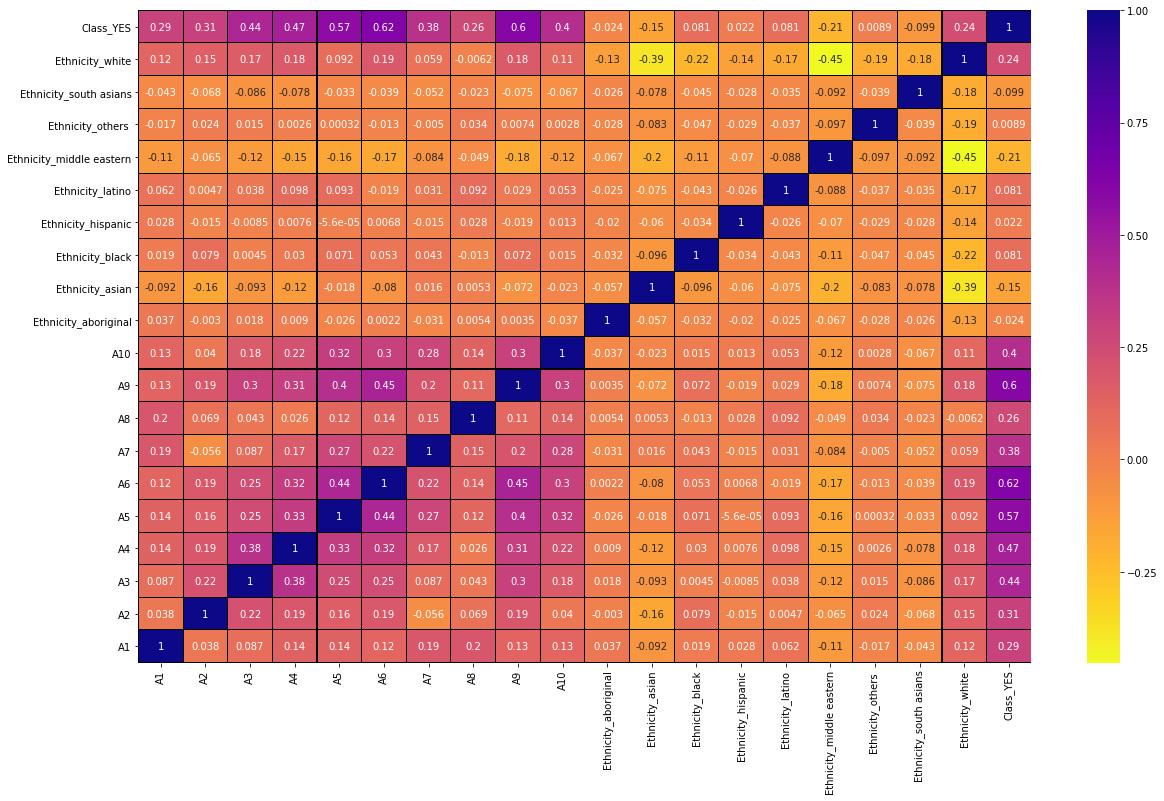

In [5]:
# Make the heatmap

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,12))

ax=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="plasma_r", linewidths=.1,
              linecolor='black')
ax.set_ylim(0, 20)

# Save image
#plt.savefig(os.path.join("..", "Images", "HeatMap.png"))

# Colors I like:
# plasma_r, spring_r, tab10, viridis_r